# Solar Cell Experiment

In [1]:
from IPython.display import Image

## Modules to Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
import sympy as smp
import pandas as pd
import seaborn as sns

## Working Formula

## Plots

### Voltage vs. $\frac{1}{d^2}$

In [3]:
data1 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot1')
display(data1.head())
x1 = data1['1/d2 in 1/mm2'].to_numpy()
y1 = data1['V in mV'].to_numpy()

,d in mm,1/d2 in 1/mm2,V in mV
0,800,0.000002,0.7
1,775,0.000002,0.8
2,750,0.000002,0.8
3,725,0.000002,0.9
4,700,0.000002,0.9


In [4]:
def linfit(V, a, b):
    return a*V + b
popt, pcov = curve_fit(linfit, x1, y1, p0=[1e5, 0.1])
p1, p2 = popt
x1f = np.linspace(x1.min(), x1.max(), 100)
y1f = linfit(x1f, p1, p2)

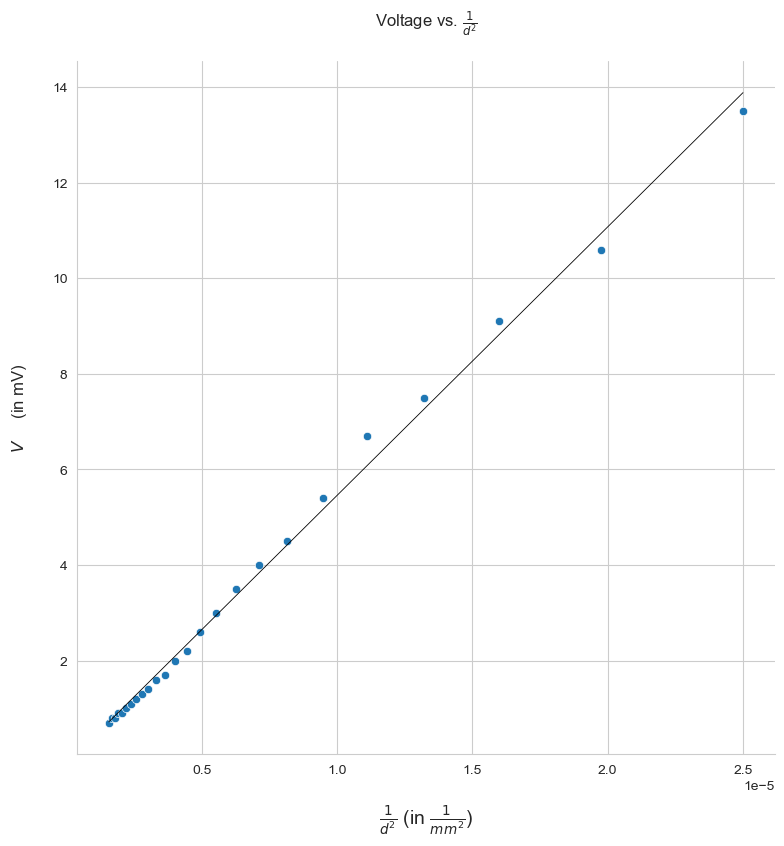

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,9))
# sns.lineplot(data=data1, x='1/d2 in 1/mm2', y='V in mV', palette='Set1', linewidth=0.4)
plt.plot(x1f, y1f, 'black', lw=0.6)
sns.scatterplot(data=data1, x='1/d2 in 1/mm2', y='V in mV', palette='Set1')
sns.despine()
plt.title('Voltage vs. $\\frac{1}{d^2}$\n')
plt.xlabel('\n$\\frac{1}{d^2}$\t(in $\\frac{1}{mm^2}$)', fontsize=14)
plt.ylabel('$V$\t(in mV)\n', fontsize=12)
# plt.xlim(0,1)
# plt.xticks(np.arange(-0.5, 8, 0.5))
# plt.yticks(np.arange(-0.05, 0.9, 0.05))
plt.savefig('Voltage vs inv sq distance', dpi=300)
plt.show()

### Short circuit current vs. Open circuit voltage

In [6]:
data2 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot2')
display(data2.head())
x2 = data2['Vopen in V'].to_numpy()
y2 = data2['Ishort in mA'].to_numpy()

,distance in mm,Vopen in V,Ishort in mA
0,500,2.03,68.0
1,600,1.98,47.2
2,700,1.92,32.6
3,800,1.87,23.6


In [7]:
def VopenIshortfn(V, a, b):
    return a*V + b
popt, pcov = curve_fit(VopenIshortfn, x2, y2, p0=[200, 1])
p1, p2 = popt
x2f = np.linspace(x2.min(), x2.max(), 100)
y2f = VopenIshortfn(x2f, p1, p2)

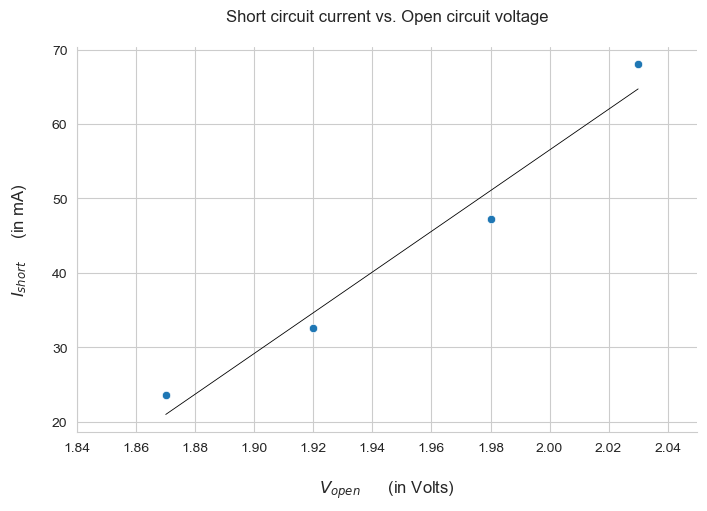

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
# sns.lineplot(data=data2, x='Vopen in V', y='Ishort in mA', palette='Set1', linewidth=0.4)
plt.plot(x2f, y2f, 'black', lw=0.6)
sns.scatterplot(data=data2, x='Vopen in V', y='Ishort in mA', palette='Set1')
sns.despine()
plt.title('Short circuit current vs. Open circuit voltage\n')
plt.xlabel('\n$V_{open}$\t(in Volts)', fontsize=12)
plt.ylabel('$I_{short}$\t(in mA)\n', fontsize=12)
plt.xlim(1.84, 2.05)
plt.xticks(np.arange(1.84, 2.05, 0.02))
plt.yticks(np.arange(20, 71, 10))
plt.savefig('Short circuit current vs Open circuit voltage', dpi=200)
plt.show()

### I-V Characteristics with normal conditions

In [9]:
data3 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot3')
display(data3.head())
x3 = data3['V in V'].to_numpy()
y3 = data3['I in mA'].to_numpy()
x31, y31 = x3[:17], y3[:17]
x32, y32 = x3[18:32], y3[18:32]
x33, y33 = x3[33:47], y3[33:47]
x34, y34 = x3[47:], y3[47:]

,distance in mm,V in V,I in mA
0,500,2.05,8.7
1,500,2.05,9.2
2,500,2.05,9.7
3,500,2.04,10.8
4,500,2.04,11.9


In [10]:
def Ifit(V, I0, k, k0):
    return I0 - np.exp(k*V-k0)

popt, pcov = curve_fit(Ifit, x31, y31, p0=[70,1,1.5])
p1, p2, p3 = popt
x31f = np.linspace(x31.min(), x31.max(), 100)
y31f = Ifit(x31f, p1, p2, p3)
print(f'Fitting parameters (I0, k, k0) for d=500mm: {p1, p2, p3}')

popt, pcov = curve_fit(Ifit, x32, y32, p0=[70,1,1.5])
p1, p2, p3 = popt
x32f = np.linspace(x32.min(), x32.max(), 100)
y32f = Ifit(x32f, p1, p2, p3)
print(f'Fitting parameters (I0, k, k0) for d=600mm: {p1, p2, p3}')

popt, pcov = curve_fit(Ifit, x33, y33, p0=[70,1,1.5])
p1, p2, p3 = popt
x33f = np.linspace(x33.min(), x33.max(), 100)
y33f = Ifit(x33f, p1, p2, p3)
print(f'Fitting parameters (I0, k, k0) for d=700mm: {p1, p2, p3}')

popt, pcov = curve_fit(Ifit, x34, y34, p0=[70,1,1.5])
p1, p2, p3 = popt
x34f = np.linspace(x34.min(), x34.max(), 100)
y34f = Ifit(x34f, p1, p2, p3)
print(f'Fitting parameters (I0, k, k0) for d=800mm: {p1, p2, p3}')

Fitting parameters (I0, k, k0) for d=500mm: (73.32089103463348, 8.896502831550526, 14.069946807259264)
Fitting parameters (I0, k, k0) for d=600mm: (45.204924671039606, 7.593443486821582, 11.596424351138475)
Fitting parameters (I0, k, k0) for d=700mm: (31.900067364557884, 7.51559387408083, 11.369327479255949)
Fitting parameters (I0, k, k0) for d=800mm: (22.50185407894906, 8.027997195184568, 11.948891882818565)


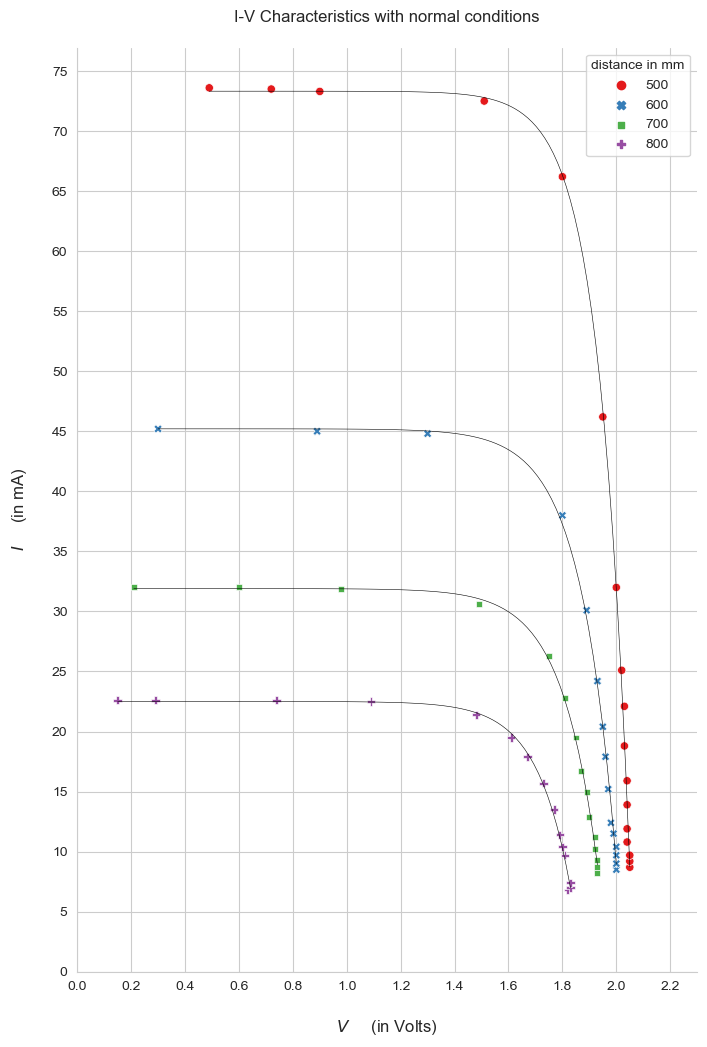

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,12))
# sns.lineplot(data=data3, x='V in V', y='I in mA', hue='distance in mm', palette='Set1', linewidth=0.4)
plt.plot(x31f, y31f, 'black', lw=0.4)
plt.plot(x32f, y32f, 'black', lw=0.4)
plt.plot(x33f, y33f, 'black', lw=0.4)
plt.plot(x34f, y34f, 'black', lw=0.4)
sns.scatterplot(data=data3, x='V in V', y='I in mA', hue='distance in mm', 
                style='distance in mm', palette='Set1')
sns.despine()
plt.title('I-V Characteristics with normal conditions\n')
plt.xlabel('\n$V$\t(in Volts)', fontsize=12)
plt.ylabel('$I$\t(in mA)\n', fontsize=12)
plt.xlim(0,2.3)
plt.xticks(np.arange(0, 2.3, 0.2))
plt.yticks(np.arange(0, 80, 5))
plt.savefig('I-V Characteristics with normal conditions', dpi=300)
plt.show()

### I-V Characteristics in a different temperature (using blower)

In [12]:
data4 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot4')
display(data4.head())
x4 = data4['V in V'].to_numpy()
y4 = data4['I in mA'].to_numpy()

,distance in mm,V in V,I in mA
0,600,1.98,8.3
1,600,1.98,8.9
2,600,1.97,9.4
3,600,1.96,10.2
4,600,1.96,11.0


In [13]:
popt, pcov = curve_fit(Ifit, x4, y4, p0=[70,1,1.5])
p1, p2, p3 = popt
x4f = np.linspace(x4.min(), x4.max(), 100)
y4f = Ifit(x32f, p1, p2, p3)
print(f'Fitting parameters (I0, k, k0) for d=600mm: {p1, p2, p3}')

Fitting parameters (I0, k, k0) for d=600mm: (44.55345819735848, 5.559498456462762, 7.386615004009343)


C:\Users\suman\AppData\Local\Temp\ipykernel_2564\387522687.py:2: RuntimeWarning: overflow encountered in exp
  return I0 - np.exp(k*V-k0)


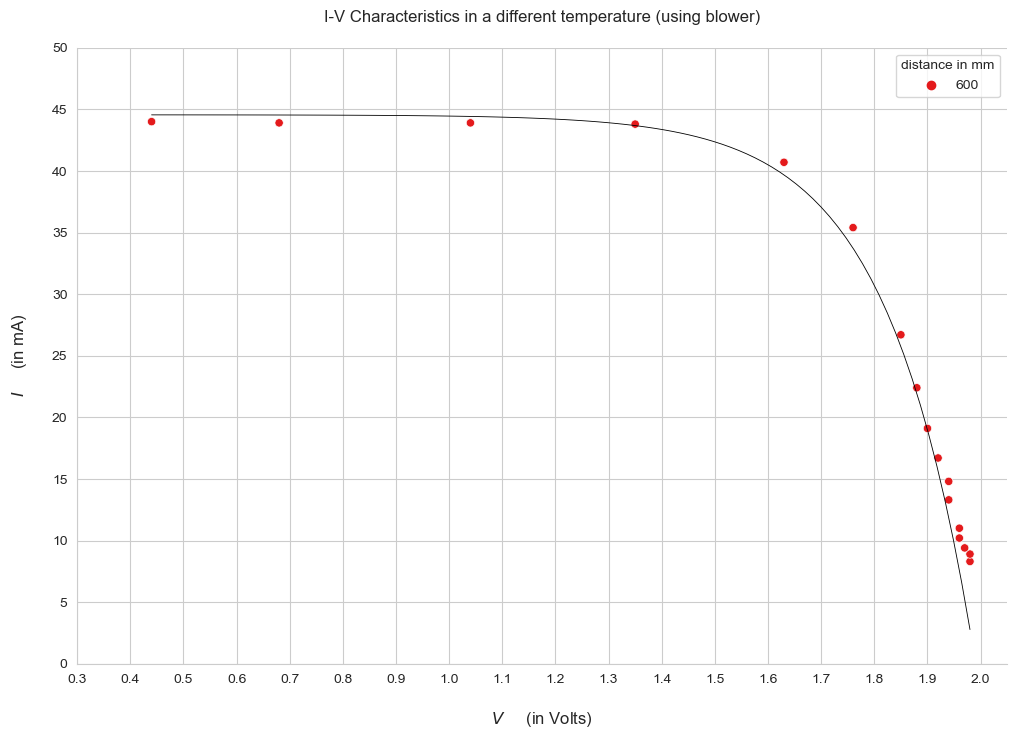

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
# sns.lineplot(data=data4, x='V in V', y='I in mA', hue='distance in mm', palette='Set1', linewidth=0.4)
plt.plot(x4f, y4f, 'black', lw=0.6)
sns.scatterplot(data=data4, x='V in V', y='I in mA', hue='distance in mm', 
                style='distance in mm', palette='Set1')
sns.despine()
plt.title('I-V Characteristics in a different temperature (using blower)\n')
plt.xlabel('\n$V$\t(in Volts)', fontsize=12)
plt.ylabel('$I$\t(in mA)\n', fontsize=12)
plt.xlim(0.3,2.05)
plt.xticks(np.arange(0.3, 2.05, 0.1))
plt.yticks(np.arange(0, 51, 5))
plt.savefig('I-V Characteristics in a different temperature (using blower)', dpi=300)
plt.show()

### I-V Characteristics with glass absorber

In [15]:
data5 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot5')
display(data5.head())
x5 = data5['V in V'].to_numpy()
y5 = data5['I in mA'].to_numpy()

,distance in mm,V in V,I in mA
0,600,1.95,6.3
1,600,1.94,7.2
2,600,1.94,7.8
3,600,1.93,8.9
4,600,1.93,9.7


In [16]:
popt, pcov = curve_fit(Ifit, x5, y5, p0=[70,1,1.5])
p1, p2, p3 = popt
x5f = np.linspace(x5.min(), x5.max(), 100)
y5f = Ifit(x32f, p1, p2, p3)
print(f'Fitting parameters (I0, k, k0) for d=600mm: {p1, p2, p3}')

Fitting parameters (I0, k, k0) for d=600mm: (36.1659071699843, 8.210668582642711, 12.581370919743)


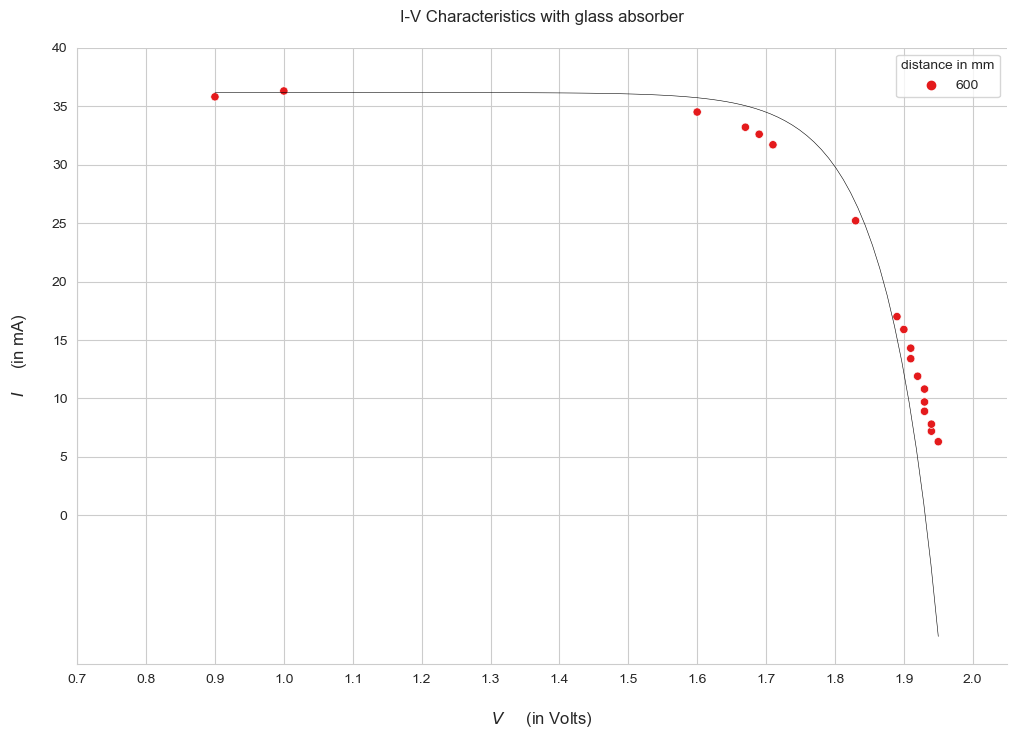

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
# sns.lineplot(data=data5, x='V in V', y='I in mA', hue='distance in mm', palette='Set1', linewidth=0.4)
plt.plot(x5f, y5f, 'black', lw=0.4)
sns.scatterplot(data=data5, x='V in V', y='I in mA', hue='distance in mm', 
                style='distance in mm', palette='Set1')
sns.despine()
plt.title('I-V Characteristics with glass absorber\n')
plt.xlabel('\n$V$\t(in Volts)', fontsize=12)
plt.ylabel('$I$\t(in mA)\n', fontsize=12)
plt.xlim(0.7, 2.05)
plt.xticks(np.arange(0.7, 2.05, 0.1))
plt.yticks(np.arange(0, 41, 5))
plt.savefig('I-V Characteristics with glass absorber', dpi=300)
plt.show()